## Αλγόριθμος με Decision Tree για την πρόβλεψη μετοχών

In [100]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [101]:
# Λήψη δεδομένων μετοχής από το yfinance
symbol = 'AMZN'  # Παράδειγμα με μετοχή Amazon
start_date = '2018-11-30'
end_date = '2023-11-30'
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [102]:
df.dropna(inplace=True)  # Αφαίρεση γραμμών με NaN

In [125]:
# Προετοιμασία δεδομένων
df['Date'] = df.index
X = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = df['Close']

In [124]:
# Διαχωρισμός σε train και test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Δημιουργία και εκπαίδευση μοντέλου
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [122]:
# Υπολογισμός της πρόβλεψης
predictions = model.predict(X_test)

In [121]:
# Σορτάρισμα των δεδομένων για την εμφάνιση των προβλέψεων
test_data_sorted = X_test.copy()
test_data_sorted['Predictions'] = predictions
test_data_sorted = test_data_sorted.sort_index()

In [120]:
# Αξιολόγηση του μοντέλου με τις μετρικές MSE και MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.4438681323972271
Mean Absolute Error (MAE): 0.43485140422033886


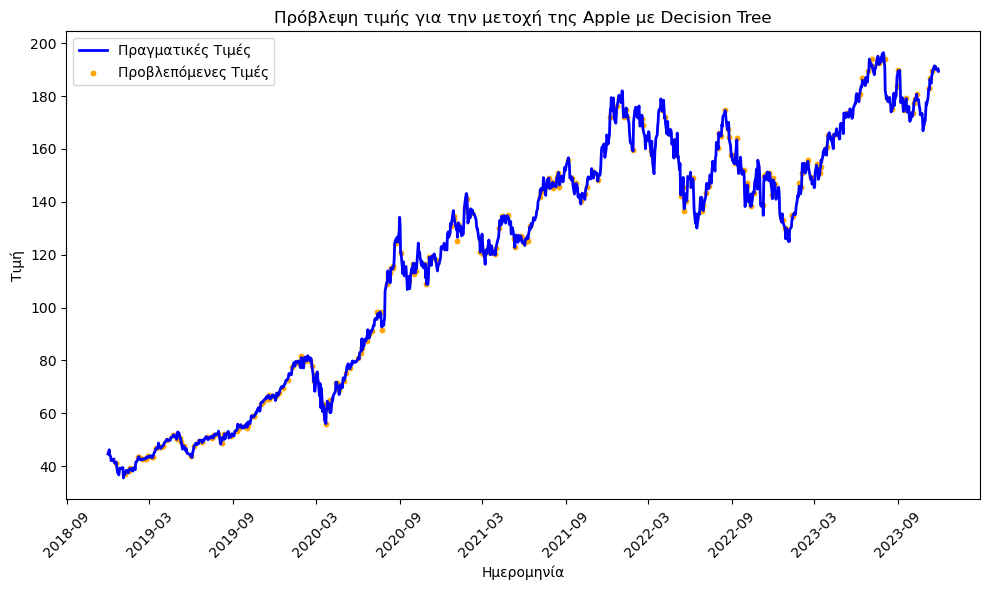

In [126]:
# Παρουσίαση αποτελεσμάτων
plt.figure(figsize=(10,6))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.index, df['Close'], label='Πραγματικές Τιμές', color='blue', linewidth=2)
plt.scatter(test_data_sorted.index, test_data_sorted['Predictions'], label='Προβλεπόμενες Τιμές', color='orange', s=10)
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.title('Πρόβλεψη τιμής για την μετοχή της Amazon με Decision Tree')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [113]:
# Υπολογίζουμε το μέσο όρο και την τυπική απόκλιση των τελευταίων 30 ημερών για τα features
mean_values = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']].tail(30).mean()
std_values = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']].tail(30).std()

# Προσδιορίζουμε την τελευταία ημερομηνία των δεδομένων
last_date = df.index[-1]

# Δημιουργούμε ένα νέο DataFrame για τις μελλοντικές ημερομηνίες
future_dates = pd.date_range(start=last_date, periods=30, freq='D')
future_df = pd.DataFrame(index=future_dates)

# Προσθέτουμε τυχαία διακύμανση στις μέσες τιμές για κάθε feature
for feature in mean_values.index:
    future_df[feature] = mean_values[feature] + np.random.normal(0, std_values[feature], size=len(future_dates))

# Κάνουμε προβλέψεις χρησιμοποιώντας το μοντέλο
future_predictions = model.predict(future_df[['Open', 'High', 'Low', 'Volume', 'Adj Close']])

# Εκτυπώνουμε τις προβλέψεις
future_df['Predictions'] = future_predictions


### Προσωμοίωση με τυχαία διακύμανση

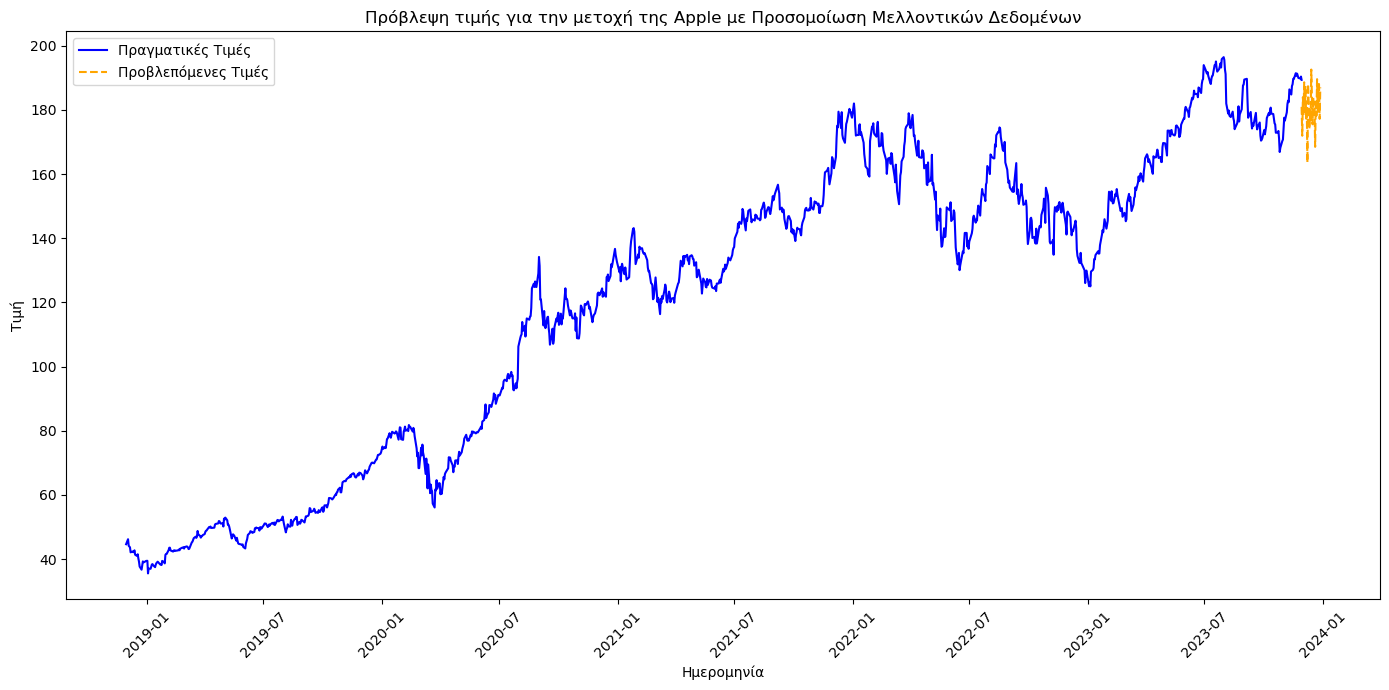

In [127]:
# Ρυθμίζουμε τον οριζόντιο άξονα (x-axis) για να εμφανίζει ημερομηνίες κάθε έξι μήνες
locator = mdates.MonthLocator(interval=6)
formatter = mdates.DateFormatter('%Y-%m')

# Δημιουργία του διαγράμματος
plt.figure(figsize=(14, 7))
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Πραγματικές τιμές
plt.plot(df.index, df['Close'], label='Πραγματικές Τιμές', color='blue')

# Προβλεπόμενες τιμές για το μέλλον
plt.plot(future_df.index, future_df['Predictions'], label='Προβλεπόμενες Τιμές', color='orange', linestyle='--')

plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.title('Πρόβλεψη τιμής για την μετοχή της Amazon με Προσομοίωση Μελλοντικών Δεδομένων')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()